# Oxygen comsumption in a lift

According to [this page](https://health.howstuffworks.com/human-body/systems/respiratory/question98.htm), the average adult breathes around 7–8 L of air per minute. Starting with air of 20% oxygen, this produces air with 15% oxygen.

Let's interpret that as a per-minute oxygen consumption of

$$\frac{\mathrm{d}V_{\mathrm{ox}}}{\mathrm{d}t} =  - V'_0 \times C_{\mathrm{ox}} \times \eta \qquad \mathrm{where}~~\eta = \frac{1}{4} ~~\mathrm{and}~~ V'_0 = 7.5\;\mathrm{L\;min}^{-1}$$

Now given that

$$C_{\mathrm{ox}} \equiv \frac{V_{\mathrm{ox}}}{V_\Omega}$$

this results in the straightforward differential equation

$$ \frac{\mathrm{d}C_{\mathrm{ox}}}{\mathrm{d}t} = - \frac{ N_\mathrm{people} V'_\mathrm{ox} \eta } { V_\Omega } \times C_{\mathrm{ox}}$$


$$C_\mathrm{ox}(t) = C_\mathrm{ox}(0) \exp(-kt) \qquad \mathrm{with~~} k = \frac{ N_\mathrm{people} V'_\mathrm{ox} \eta } { V_\Omega } $$

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import pint
ureg = pint.UnitRegistry()

In [3]:
N = 11
V_prime = 7.5 * ureg.L / ureg.min
η = 1/4
V_person = 0.1 * ureg.metre**3
V_room = 1.2 * 1.2 * 2.2 * ureg.metre**3
V_air = V_room - N * V_person

k = N * V_prime * η / V_air

k.to('min^-1')

<Quantity(0.00997340425531915, '1 / minute')>

> Oxygen deprivation is one form of asphyxiation. While it is desirable to maintain the atmospheric oxygen level at 21% by volume, the body can tolerate deviation from this ideal. **When the oxygen level falls to 17%, the first sign of hypoxia is a deterioration to night vision which is not noticeable until a normal oxygen concentration is restored. Physiologic effects are increased breathing volume and accelerated heartbeat.** Between 14-16% physiologic effects are increased breathing volume, accelerated heartbeat, very poor muscular coordination, rapid fatigue, and intermittent respiration. Between 6-10% the effects are nausea, vomiting, inability to perform, and unconsciousness. **Less than 6%, spasmatic breathing, convulsive movements, and death in minutes.**

https://web.archive.org/web/20040405214417/http://www.osha.gov/SLTC/smallbusiness/sec12.html


Text(0.5,1,'Number of people: 11')

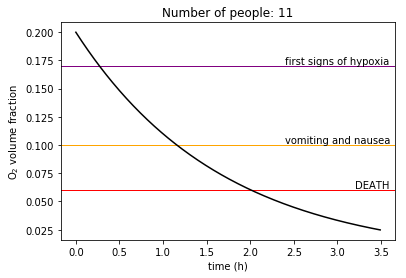

In [4]:
C_0 = 0.2

hypoxia = 0.17
vomiting = 0.1
death = 0.06

t = np.arange(0, 3.5, 0.01) * ureg.hour
concentration = C_0 * np.exp(-k * t)

plt.axhline(hypoxia, color='purple', lw=1)
plt.axhline(vomiting, color='orange', lw=1)
plt.axhline(death, color='r', lw=1)

plt.plot(t, concentration, 'k')

plt.xlabel('time (h)')
plt.ylabel('O$_2$ volume fraction')
plt.text(3.2, death+.002, "DEATH")
plt.text(2.4, vomiting+.002, "vomiting and nausea")
plt.text(2.4, hypoxia+.002, "first signs of hypoxia")

plt.title(f'Number of people: {N}')

#plt.savefig('death.pdf')

In [5]:
def time_of_death(N):
    k = N * V_prime * η / V_air
    return (- np.log(death / C_0) / k).to('min')

def time_of_suffocation(N):
    k = N * V_prime * η / V_air
    return (- np.log(vomiting / C_0) / k).to('min')



Text(0,0.5,'time (h)')

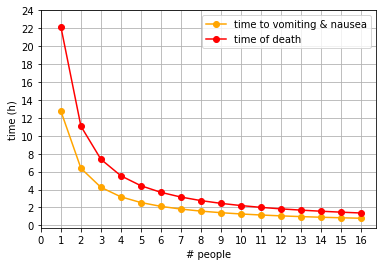

In [6]:
NN = np.arange(1, 17)
suffocation_times_h = [time_of_suffocation(n).m_as('hour') for n in NN]
death_times_h = [time_of_death(n).m_as('hour') for n in NN]
plt.plot(NN, suffocation_times_h, 'o-', color='orange', label='time to vomiting & nausea')
plt.plot(NN, death_times_h, 'o-', color='r', label='time of death')
plt.legend()
plt.yticks(np.arange(0, 25, 2))
plt.xticks(np.arange(0, 17, 1))
plt.grid()
plt.xlabel('# people')
plt.ylabel('time (h)')
#plt.savefig('death2.pdf')